# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,162,98,39,81,191,64,9,166,40,20,138,184,415,131,62,8,19,197,205
1,283,116,53,110,231,67,12,217,31,24,165,231,692,222,67,16,28,192,206
2,587,84,38,74,138,57,8,139,49,18,127,160,282,127,72,9,20,183,191
3,104,102,45,83,198,65,5,194,33,22,146,225,576,167,79,0,27,193,191
4,631,103,49,107,179,54,12,208,32,24,159,214,644,183,66,1,12,191,200
5,518,85,40,75,137,56,7,152,44,19,134,173,339,160,76,7,16,182,187
6,615,88,34,69,152,57,5,138,48,18,122,158,284,120,62,9,29,204,210
7,744,96,46,88,174,68,10,155,43,19,148,173,354,182,69,14,15,194,202
8,438,91,49,86,195,63,8,177,37,21,156,203,473,201,67,7,5,192,198
9,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,408.859745,93.730419,45.023679,82.145719,169.633880,62.027322,8.712204,169.546448,40.750455,20.641166,148.446266,189.706740,443.806922,175.845173,72.892532,6.573770,12.329690,188.799636,195.380692
std,240.055636,8.145137,6.249481,15.429398,34.285284,9.024964,5.442555,33.682070,7.735926,2.646548,14.699277,31.995888,180.623340,32.913175,7.923754,4.907216,8.904125,6.015182,7.375417
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,68.000000,3.000000,5.000000,184.000000,190.000000
50%,409.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,615.000000,100.000000,50.000000,98.000000,195.000000,66.000000,10.000000,199.000000,46.000000,23.000000,160.000000,217.000000,595.000000,200.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Проведем нормировку параметров, так как далее необходимо построить логистическую регрессию.

Фит_трансформ на обучении, трансформ на тесте, чтобы избежать даталика

In [6]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train_pd)
X_train_pd_scaled = pd.DataFrame(x_scaled)
X_test_pd_scaled = pd.DataFrame(min_max_scaler.transform(X_test_pd))

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)


In [9]:
# Проведем подбор гиперпараметров с помощью крос валидации

for i in [0.5,1,1.5,2,2.5,3,3.5,6]:

    mod_lin = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = i)
    
    print(f'For regularization coef {i} score = {np.mean(cross_val_score(mod_lin, X_train_pd_scaled, y_train, cv=cv, scoring="f1_macro"))}')

For regularization coef 0.5 score = 0.5977951607552787
For regularization coef 1 score = 0.6291163795935871
For regularization coef 1.5 score = 0.6655956942932345
For regularization coef 2 score = 0.6773159611005879
For regularization coef 2.5 score = 0.6875011809666781
For regularization coef 3 score = 0.7039546131363271
For regularization coef 3.5 score = 0.709100782644608
For regularization coef 6 score = 0.7178000781150506


In [10]:
mod_lin = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = 6)
mod_lin.fit(X_train_pd_scaled,y_train)

y_pred = mod_lin.predict(X_test_pd_scaled)
y_pred_proba = mod_lin.predict_proba(X_test_pd_scaled)

In [11]:
# Проверим баланс классов

np.asarray(np.unique(y_pred, return_counts=True)).T

array([['bus', 78],
       ['opel', 59],
       ['saab', 75],
       ['van', 85]], dtype=object)

In [12]:
print('accuracy_score: ',accuracy_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test, y_pred, average='weighted'))
print('roc_auc_score: ',roc_auc_score(y_test, 
                                      y_pred_proba,
                                      multi_class = 'ovo'))

accuracy_score:  0.7306397306397306
f1_score:  0.7167476617893158
roc_auc_score:  0.9287880576250593


In [19]:
y_test

array(['bus', 'van', 'bus', 'opel', 'van', 'opel', 'opel', 'bus', 'saab',
       'bus', 'opel', 'opel', 'saab', 'saab', 'van', 'opel', 'bus', 'van',
       'van', 'bus', 'saab', 'opel', 'bus', 'bus', 'saab', 'saab', 'saab',
       'opel', 'van', 'saab', 'opel', 'bus', 'saab', 'saab', 'saab',
       'opel', 'opel', 'saab', 'van', 'opel', 'opel', 'saab', 'saab',
       'bus', 'van', 'saab', 'saab', 'saab', 'bus', 'opel', 'van', 'saab',
       'opel', 'saab', 'opel', 'saab', 'opel', 'saab', 'van', 'opel',
       'opel', 'bus', 'bus', 'opel', 'van', 'opel', 'saab', 'van', 'saab',
       'saab', 'opel', 'van', 'bus', 'opel', 'opel', 'saab', 'bus', 'bus',
       'bus', 'saab', 'saab', 'saab', 'bus', 'van', 'saab', 'van', 'opel',
       'van', 'opel', 'van', 'opel', 'saab', 'van', 'opel', 'saab',
       'saab', 'van', 'van', 'van', 'opel', 'bus', 'opel', 'opel', 'opel',
       'opel', 'saab', 'opel', 'bus', 'van', 'saab', 'van', 'saab', 'bus',
       'van', 'saab', 'opel', 'saab', 'van', 'ope

In [18]:
y_pred

array(['bus', 'van', 'bus', 'bus', 'van', 'opel', 'saab', 'bus', 'opel',
       'van', 'opel', 'saab', 'opel', 'saab', 'van', 'saab', 'bus', 'van',
       'van', 'bus', 'saab', 'opel', 'bus', 'bus', 'saab', 'saab', 'saab',
       'saab', 'van', 'saab', 'opel', 'bus', 'bus', 'saab', 'saab',
       'opel', 'opel', 'saab', 'van', 'opel', 'opel', 'van', 'saab',
       'bus', 'van', 'saab', 'saab', 'opel', 'bus', 'saab', 'van', 'saab',
       'opel', 'van', 'van', 'saab', 'opel', 'saab', 'van', 'opel', 'bus',
       'bus', 'bus', 'saab', 'van', 'bus', 'bus', 'van', 'saab', 'saab',
       'opel', 'van', 'bus', 'saab', 'opel', 'van', 'bus', 'bus', 'bus',
       'bus', 'saab', 'saab', 'bus', 'van', 'saab', 'van', 'opel', 'van',
       'saab', 'van', 'opel', 'bus', 'van', 'opel', 'saab', 'opel', 'van',
       'van', 'van', 'van', 'bus', 'saab', 'opel', 'opel', 'van', 'saab',
       'saab', 'bus', 'van', 'saab', 'van', 'opel', 'bus', 'van', 'saab',
       'saab', 'saab', 'van', 'saab', 'bus', 'o

In [13]:
from scikitplot.metrics import plot_roc

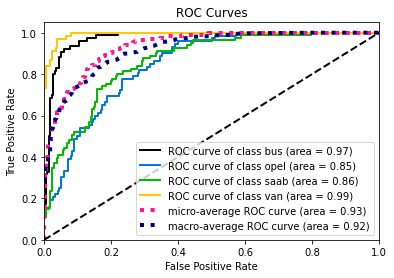

In [14]:
plot_roc(y_test, y_pred_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

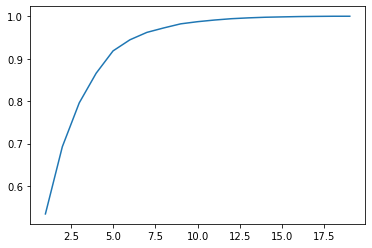

In [16]:
pca = PCA()
pca.fit(X_train_pd_scaled)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)


sns.lineplot(x=range(1, exp_var_cumul.shape[0] + 1), y=exp_var_cumul)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [17]:
# Возьмем 10 компонент, так как explained_variance уже достаточно велико

pca = PCA(n_components = 10)
X_pca_train = pca.fit_transform(X_train_pd_scaled)
X_pca_test = pca.transform(X_test_pd_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [18]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Проведем подбор гиперпараметров с помощью крос валидации

for i in [0.5,1,1.5,2,2.5,3,3.5,6]:

    mod_lin_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = i)
    
    print(f'For regularization coef {i} score = {np.mean(cross_val_score(mod_lin_pca, X_pca_train, y_train, cv=cv, scoring="f1_macro"))}')

For regularization coef 0.5 score = 0.6356801993385341
For regularization coef 1 score = 0.6578182957859254
For regularization coef 1.5 score = 0.688759818723558
For regularization coef 2 score = 0.6971547190027084
For regularization coef 2.5 score = 0.6958203247625164
For regularization coef 3 score = 0.6993372509705268
For regularization coef 3.5 score = 0.7013102509647586
For regularization coef 6 score = 0.7075181205941895


In [19]:
mod_lin_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = 6)
mod_lin_pca.fit(X_pca_train,y_train)

y_pred_pca = mod_lin_pca.predict(X_pca_test)
y_pred_proba_pca = mod_lin_pca.predict_proba(X_pca_test)

In [20]:
print('accuracy_score: ',accuracy_score(y_test, y_pred_pca))
print('f1_score: ',f1_score(y_test, y_pred_pca, average='weighted'))
print('roc_auc_score: ',roc_auc_score(y_test, 
                                      y_pred_proba_pca,
                                      multi_class = 'ovo'))

accuracy_score:  0.6835016835016835
f1_score:  0.6674699610818526
roc_auc_score:  0.8920657428464852


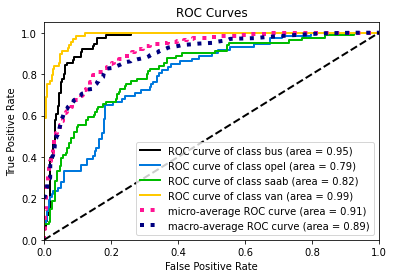

In [21]:
plot_roc(y_test, y_pred_proba_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

# Проведем подбор гиперпараметров с помощью крос валидации

for i in range(5,20):

    mod_tree = DecisionTreeClassifier(max_depth=i, random_state=1)
    
    print(f'For max_depth {i} score = {np.mean(cross_val_score(mod_tree, X_train, y_train, cv=cv, scoring="f1_macro"))}')

For max_depth 5 score = 0.6602620745797079
For max_depth 6 score = 0.6717540359043556
For max_depth 7 score = 0.6899461683029541
For max_depth 8 score = 0.6684760060931036
For max_depth 9 score = 0.6857736187838541
For max_depth 10 score = 0.6752258515940732
For max_depth 11 score = 0.6864408971306196
For max_depth 12 score = 0.6894438845065005
For max_depth 13 score = 0.6841582555982777
For max_depth 14 score = 0.6841582555982777
For max_depth 15 score = 0.6841582555982777
For max_depth 16 score = 0.6841582555982777
For max_depth 17 score = 0.6841582555982777
For max_depth 18 score = 0.6841582555982777
For max_depth 19 score = 0.6841582555982777


In [24]:
mod_tree = DecisionTreeClassifier(max_depth = 12, random_state=1)
mod_tree.fit(X_train,y_train)

y_pred = mod_tree.predict(X_test)
y_pred_proba = mod_tree.predict_proba(X_test)

In [25]:
print('accuracy_score: ',accuracy_score(y_test, y_pred))
print('f1_score: ',f1_score(y_test, y_pred, average='weighted'))
print('roc_auc_score: ',roc_auc_score(y_test, 
                                      y_pred_proba,
                                      multi_class = 'ovo'))

accuracy_score:  0.6734006734006734
f1_score:  0.6765755634576922
roc_auc_score:  0.7893106106694355


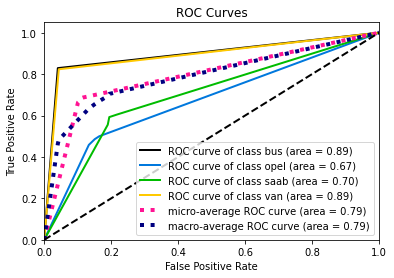

In [26]:
plot_roc(y_test, y_pred_proba)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [27]:
from sklearn.ensemble import BaggingClassifier

Linear

In [28]:
acc_dict = {}
f1_dict = {}
for i in range(2,100,5):
    linera_bag = BaggingClassifier(base_estimator=mod_lin,
                             n_estimators=i, random_state=0, n_jobs=4).fit(X_train_pd_scaled,y_train)

    y_pred = linera_bag.predict(X_test_pd_scaled)
    
    acc_dict[i] = accuracy_score(y_test, y_pred)
    f1_dict[i] = f1_score(y_test, y_pred, average='weighted')

In [29]:
import operator
best_acc  = max(acc_dict.items(), key=operator.itemgetter(1))[0]
best_f1 = max(f1_dict.items(), key=operator.itemgetter(1))[0]
print(f'Наилучший (accuracy) ансамбль моделей состоит из {best_acc} моделей')
print(f'Наилучший (f1) ансамбль моделей состоит из {best_f1} моделей')

Наилучший (accuracy) ансамбль моделей состоит из 17 моделей
Наилучший (f1) ансамбль моделей состоит из 17 моделей


In [30]:
print(f'accuracy = {acc_dict[best_acc]}')

print(f'f1 = {f1_dict[best_f1]}')

accuracy = 0.7272727272727273
f1 = 0.7130257111767695


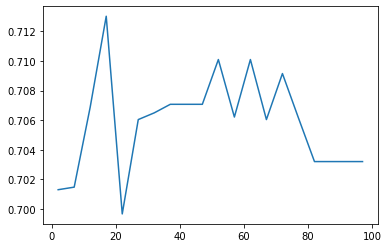

In [31]:
lists = sorted(f1_dict.items())
x_f1, y_f1 = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_f1)
plt.show()

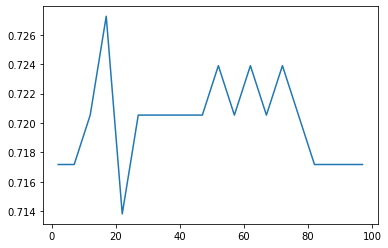

In [32]:
lists = sorted(acc_dict.items())
x_acc, y_acc = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_acc)
plt.show()

Tree

In [33]:
acc_dict = {}
f1_dict = {}
for i in range(2,100,5):
    tree_bag = BaggingClassifier(base_estimator=mod_tree,
                             n_estimators=i, random_state=0, n_jobs=4).fit(X_train_pd_scaled,y_train)

    y_pred = tree_bag.predict(X_test_pd_scaled)
    
    acc_dict[i] = accuracy_score(y_test, y_pred)
    f1_dict[i] = f1_score(y_test, y_pred, average='weighted')

In [34]:
import operator

print(f'Наилучший (accuracy) ансамбль моделей состоит из {best_acc} моделей')
print(f'Наилучший (f1) ансамбль моделей состоит из {best_f1} моделей')

Наилучший (accuracy) ансамбль моделей состоит из 17 моделей
Наилучший (f1) ансамбль моделей состоит из 17 моделей


In [35]:
print(f'accuracy = {acc_dict[best_acc]}')

print(f'f1 = {f1_dict[best_f1]}')

accuracy = 0.7407407407407407
f1 = 0.7350148679923055


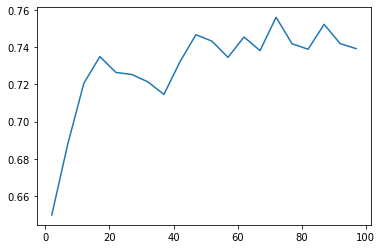

In [36]:
lists = sorted(f1_dict.items())
x_f1, y_f1 = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_f1)
plt.show()

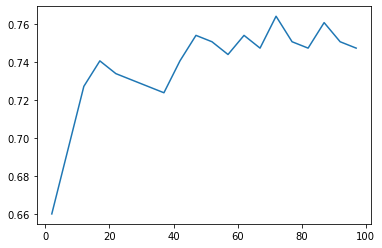

In [37]:
lists = sorted(acc_dict.items())
x_acc, y_acc = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_acc)
plt.show()

При использовании бегинга на лесах скор возрастает практически линейно, так как мы уменьшаем varianse, а у лесов он как раз большой, а bias маленький

На линейных алгоритмах бегинг не имеет смысла, так как varianse и так низкий, а bias бегинг не уберет

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
acc_dict = {}
f1_dict = {}
for i in range(2,100,5):
    mod_rand_tree = RandomForestClassifier(n_estimators=i ,max_depth = 12, random_state=1)
    mod_rand_tree.fit(X_train,y_train)
    
    y_pred = mod_rand_tree.predict(X_test)

    acc_dict[i] = accuracy_score(y_test, y_pred)
    f1_dict[i] = f1_score(y_test, y_pred, average='weighted')

In [40]:
best_acc  = max(acc_dict.items(), key=operator.itemgetter(1))[0]
best_f1 = max(f1_dict.items(), key=operator.itemgetter(1))[0]
print(f'Наилучший (accuracy) RandomForest получает из {best_acc} деревьев, точность составила {acc_dict[best_acc]}')
print(f'Наилучший (f1) RandomForest получает из {best_f1} деревьев точность составила {f1_dict[best_f1]}')

Наилучший (accuracy) RandomForest получает из 27 деревьев, точность составила 0.7878787878787878
Наилучший (f1) RandomForest получает из 27 деревьев точность составила 0.7836205853200944


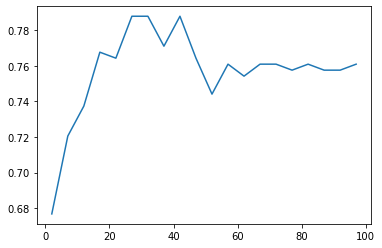

In [41]:
lists = sorted(acc_dict.items())
x_acc, y_acc = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_acc)
plt.show()

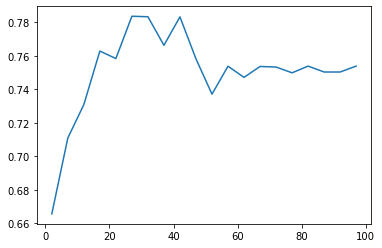

In [42]:
lists = sorted(f1_dict.items())
x_f1, y_f1 = zip(*lists)
sns.lineplot(x=range(2,100,5), y=y_f1)
plt.show()

Результат похож на бэгинг, но потребовалось меньше деревьев для достижения схожих результатов

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [48]:
mod_lin = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C = 6)
mod_tree = DecisionTreeClassifier(max_depth = 12, random_state=1)
mod_rand_tree = RandomForestClassifier(n_estimators=27 ,max_depth = 12, random_state=1)

In [82]:
import math

def spliter(df, n):
    
    df_dict = dict()
    step = math.ceil(df.shape[0]/n)
    left = 0
    right = step
    for i in range(n):
        df_dict[i] = df[left:right]
        left = right
        right += step
    return df_dict

In [97]:
X_dict = spliter(X_train, 10)
y_dict = spliter(y_train, 10)

In [123]:
acc_dict_tree = {}
f1_dict_tree = {}
for i in range(10):
    X_concat = np.concatenate([X_dict[j] for j in range(0,i+1)])
    y_concat = np.concatenate([y_dict[j] for j in range(0,i+1)])
    mod_tree.fit(X_concat, y_concat)
    
    y_pred = mod_tree.predict(X_test)
    acc_dict_tree[i] = accuracy_score(y_test, y_pred)
    f1_dict_tree[i] = f1_score(y_test, y_pred, average='weighted')

In [125]:
acc_dict_rand_tree = {}
f1_dict_rand_tree = {}
for i in range(10):
    X_concat = np.concatenate([X_dict[j] for j in range(0,i+1)])
    y_concat = np.concatenate([y_dict[j] for j in range(0,i+1)])
    mod_rand_tree.fit(X_concat, y_concat)
    
    y_pred = mod_rand_tree.predict(X_test)
    acc_dict_rand_tree[i] = accuracy_score(y_test, y_pred)
    f1_dict_rand_tree[i] = f1_score(y_test, y_pred, average='weighted')

In [128]:
X_dict_scaled = spliter(X_train_pd_scaled, 10)

In [134]:
acc_dict_lin = {}
f1_dict_lin = {}
for i in range(10):
    X_concat = np.concatenate([X_dict_scaled[j] for j in range(0,i+1)])
    y_concat = np.concatenate([y_dict[j] for j in range(0,i+1)])
    mod_lin.fit(X_concat, y_concat)
    
    y_pred = mod_lin.predict(X_test_pd_scaled)
    acc_dict_lin[i] = accuracy_score(y_test, y_pred)
    f1_dict_lin[i] = f1_score(y_test, y_pred, average='weighted')

In [142]:
acc_dict_lin.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
for_plot_acc = pd.DataFrame()
for_plot_acc['iteration'] = list(acc_dict_lin.keys())
for_plot_acc['tree'] = list(acc_dict_tree.values())
for_plot_acc['random_trees'] = list(acc_dict_rand_tree.values())
for_plot_acc['linear'] = list(acc_dict_lin.values())

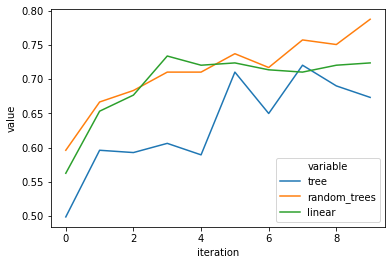

In [151]:
sns.lineplot('iteration', 'value', hue='variable', 
             data=pd.melt(for_plot_acc, 'iteration'))
plt.show()

In [152]:
for_plot_f1 = pd.DataFrame()
for_plot_f1['iteration'] = list(f1_dict_lin.keys())
for_plot_f1['tree'] = list(f1_dict_tree.values())
for_plot_f1['random_trees'] = list(f1_dict_rand_tree.values())
for_plot_f1['linear'] = list(f1_dict_lin.values())

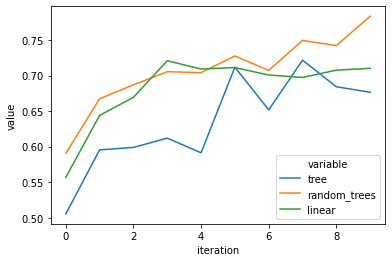

In [153]:
sns.lineplot('iteration', 'value', hue='variable', 
             data=pd.melt(for_plot_f1, 'iteration'))
plt.show()

Увеличение выборки способствует увеличению точности.

Сильнее всего это заметно на решающем дереве, так как увеличение выборки - это единственный вариант снизить variance.

На случайных деревьях эффект ниже, так как variance снижается за счет бутсрапа и случайной выборки фичей.

Линейная модель обладает наименьшим эффектом, так как увлеличегие выборки не способствует снижению смещения (к примеру, возможно, есть пропущенная переменная и увеличение кол-ва наблюдений не приеведет к исправлению этого факта)